In [ ]:
#library for understanding music
from music21 import *

In [ ]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='/content/drive/MyDrive/Mini Project- D3/MidiData/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schuim-4.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schubert_D850_3.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schuim-3.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schub_d760_4.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schub_d760_3.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schubert_D935_2.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schub_d960_1.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schubert_D850_4.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schubert_D850_1.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schub_d760_1.mid
Loading Music File: /content/drive/MyDrive/Mini Project- D3/MidiData/schub_d760_2.mid
Loading Music File: /content/drive/MyDrive/Mini Pr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

327


(array([224.,  44.,  16.,   9.,   5.,   9.,  12.,   6.,   0.,   2.]),
 array([1.0000e+00, 2.2560e+02, 4.5020e+02, 6.7480e+02, 8.9940e+02,
        1.1240e+03, 1.3486e+03, 1.5732e+03, 1.7978e+03, 2.0224e+03,
        2.2470e+03]),
 <a list of 10 Patch objects>)

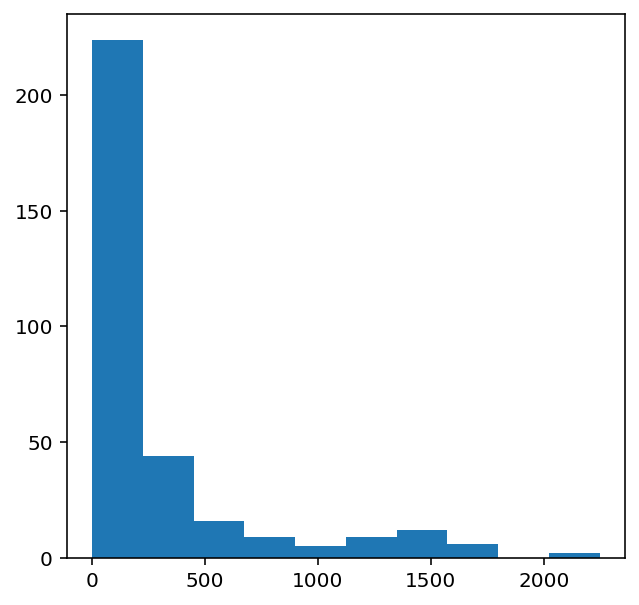

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))
print(frequent_notes)

179
['B5', 'G#2', 'E-6', 'G#5', '8.11.3', 'E-5', 'B4', 'G#4', 'E-4', '7.10', '10.3', '8.11', '3.7.10', '7.10.1', '10.1.3', 'B2', 'F#6', '11.3.6', 'F#5', 'F#4', '10.1', '11.3', '3.6', '4.10', '1.6', 'D6', '11.2.6', 'D5', '11.2', '7.9', '6.9.1', '6.9', '1.7', '4.9', '2.6', '6.10.1', '1.4', '6.10', '4.8', '8.1', '3.8', 'C6', '8.0.3', 'C5', '1.3', 'G#6', 'C#5', 'C#3', 'F5', '1.5.8', 'F4', 'E-2', 'G5', 'B-4', 'G4', 'C#6', 'F6', 'G6', 'B-5', 'E-3', 'G#3', 'G3', 'F3', 'C#4', 'C4', 'B-3', 'A6', 'A5', 'B-6', 'C7', 'C#7', '1.5', '1.4.7.10', 'E4', 'C3', 'B-2', '8.0', 'C#2', '1.4.8', 'A4', 'C2', '3.6.8', '6.8', 'E5', 'E2', '9.0', '9.1', 'B1', '11.4', '2.8', '4.7', '3.7', '0.3.6', 'G#1', '0.3', 'A1', '9.1.4', 'E6', '3.9', '5.8', '5.10', 'D2', '2.5', '9.2', '3', '8', '7.9.1', '9', '11', '4.7.9', '1', '2.6.9', 'A3', '2', '6', 'D4', '6.11', '4', '2.4.8', 'B3', 'E3', 'F#3', '4.7.11', '1.4.7', '0', '2.7', '10', '4.8.11', 'A2', 'G2', '10.2.5', '10.2', '0.3.7', '5', '0.3.5', '5.9.0', 'F2', '5.8.11', '7.10

In [ ]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)
print(new_music)

[list(['B5', 'G#2', 'E-6', 'B5', 'G#5', 'G#5', '8.11.3', 'B5', 'G#5', 'E-5', 'E-5', 'G#5', 'E-5', 'B4', 'B4', 'E-5', 'B4', 'G#4', 'G#4', 'B4', 'G#4', 'E-4', '7.10', '10.3', 'B5', 'G#2', 'E-6', 'B5', 'G#5', 'G#5', '8.11.3', 'B5', 'G#5', 'E-5', 'E-5', 'G#5', 'E-5', 'B4', 'B4', 'E-5', 'B4', 'G#4', 'G#4', 'B4', 'G#4', 'E-4', '7.10', '10.3', '8.11', '8.11.3', '3.7.10', '10.3', '7.10.1', '10.1.3', 'B5', 'G#2', 'E-6', 'B5', 'G#5', 'G#5', '8.11.3', 'B5', 'G#5', 'E-5', 'E-5', 'G#5', 'E-5', 'B4', 'B4', 'E-5', 'B4', 'G#4', 'G#4', 'B4', 'G#4', 'E-4', '7.10', '10.3', 'B5', 'G#2', 'E-6', 'B5', 'G#5', 'G#5', '8.11.3', 'B5', 'G#5', 'E-5', 'E-5', 'G#5', 'E-5', 'B4', 'B4', 'E-5', 'B4', 'G#4', 'G#4', 'B4', 'G#4', 'E-4', '7.10', '10.3', '8.11', '8.11.3', 'E-6', 'B2', 'F#6', 'E-6', 'B5', 'B5', '11.3.6', 'E-6', 'B5', 'F#5', 'F#5', 'B5', 'F#5', 'E-5', 'E-5', 'F#5', 'E-5', 'B4', 'B4', 'E-5', 'B4', 'F#4', '10.1', 'E-6', 'B2', 'F#6', 'E-6', 'B5', 'B5', '11.3.6', 'E-6', 'B5', 'F#5', 'F#5', 'B5', 'F#5', 'E-5', 'E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [ ]:

no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)
print(x)
print()
print(y)

[['B5' 'G#2' 'E-6' ... 'G#5' '8.11.3' 'B5']
 ['G#2' 'E-6' 'B5' ... '8.11.3' 'B5' 'G#5']
 ['E-6' 'B5' 'G#5' ... 'B5' 'G#5' 'E-5']
 ...
 ['G#2' 'G#3' 'C#3' ... 'G#3' 'C#4' 'F4']
 ['G#3' 'C#3' 'G#2' ... 'C#4' 'F4' '1.5.8']
 ['C#3' 'G#2' 'C#2' ... 'F4' '1.5.8' '1.5']]

['G#5' 'E-5' 'E-5' ... '1.5.8' '1.5' 'C#2']


In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
print(unique_x)
print(len(unique_x))

['8', 'G#2', 'E4', '2.4.8', 'C3', '1.5', '11.2.4', '7.11.2', '1.4.8', '4.8', '7.11', 'G2', '3', 'G#5', '7.10.2', '10.1.4', 'E7', '5', 'B3', '0.4.7', 'C4', 'B-2', '10.3', '6.10.1', 'F#5', '0', 'B1', '1.5.8', 'F#3', '3.6.8', '11.2.5.7', '5.8.11', 'F2', 'D3', '3.6.9', '9.1', 'E-2', '3.7', '5.9', '4.7.9', '2.5.7', '3.8', 'A3', 'E6', 'B-1', '0.4', 'G6', '8.0', '3.7.10', 'C#6', '11.4', '10', '0.5', '6.8', 'E-3', '6.9', 'C2', 'A1', '6', '2.8', '1', '2.5.9', 'B-3', '2.6', '6.10', '4.7', '1.3.7', 'B-4', 'G1', 'F5', '11.3.6', 'F#4', 'E-4', 'D6', '7.10.1', '2', '1.4', 'A6', '1.4.7', 'D7', 'E-6', '1.7', '7.9.1', '0.6', 'G#3', '3.6', '8.11.1', 'G5', '1.4.7.10', '0.3', '10.1', '8.1', '9.0.4', 'G#4', '5.8.10', 'D2', '7.10', '2.5.8', '4.8.11', '0.2.6', '9.1.4', '10.1.3', 'C#4', '2.7', '4.7.11', '9.2', '5.8.0', '2.4', '5.7', '0.2', '4', '2.5', 'C#2', 'C6', '6.11', 'A5', '7.0', '7.10.0', 'D4', '7.9', 'G3', '1.3', '10.1.5', 'G#6', '11.2.6', 'F#1', 'E5', '2.6.9', '8.11.3', '4.10', 'C5', 'C#7', '11', '0.3.

In [ ]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  model.summary()
  return model

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           17900     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [ ]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=60, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/60
534/534 [==============================] - 46s 83ms/step - loss: 4.5618 - val_loss: 4.0268

Epoch 00001: val_loss improved from inf to 4.02681, saving model to best_model.h5
Epoch 2/60
534/534 [==============================] - 43s 81ms/step - loss: 3.8617 - val_loss: 3.8469

Epoch 00002: val_loss improved from 4.02681 to 3.84687, saving model to best_model.h5
Epoch 3/60
534/534 [==============================] - 43s 81ms/step - loss: 3.6797 - val_loss: 3.7011

Epoch 00003: val_loss improved from 3.84687 to 3.70112, saving model to best_model.h5
Epoch 4/60
534/534 [==============================] - 43s 81ms/step - loss: 3.5429 - val_loss: 3.6392

Epoch 00004: val_loss improved from 3.70112 to 3.63923, saving model to best_model.h5
Epoch 5/60
534/534 [==============================] - 44s 82ms/step - loss: 3.4393 - val_loss: 3.5340

Epoch 00005: val_loss improved from 3.63923 to 3.53404, saving model to best_model.h5
Epoch 6/60
534/534 [==============================] - 44s 8

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(20):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions*2)
print(random_music)

[178, 178, 178, 85, 85, 85, 84, 178, 178, 84, 84, 84, 84, 83, 83, 83, 84, 84, 84, 84, 178, 178, 178, 85, 85, 85, 84, 178, 178, 84, 84, 84, 84, 83, 83, 83, 84, 84, 84, 84]
[ 93 172   5  84 176   5  67  93 172   5  84 146 178 178 178  85  85  85
  84 178 178  84  84  84  84  83  83  83  84  84  84  84]


In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]
print(predicted_notes*2)
predicted_notes=predicted_notes*2

['E-5', 'E-5', 'E-5', '3.6', '3.6', '3.6', 'G#3', 'E-5', 'E-5', 'G#3', 'G#3', 'G#3', 'G#3', '0.6', '0.6', '0.6', 'G#3', 'G#3', 'G#3', 'G#3', 'E-5', 'E-5', 'E-5', '3.6', '3.6', '3.6', 'G#3', 'E-5', 'E-5', 'G#3', 'G#3', 'G#3', 'G#3', '0.6', '0.6', '0.6', 'G#3', 'G#3', 'G#3', 'G#3']


In [ ]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')


convert_to_midi(predicted_notes)


In [ ]:
from google.colab import files
files.download('music.mid') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>